# Projeto Airbnb Rio - Ferramenta de Previsão de Preço de Imóvel para pessoas comuns 

### Contexto

No Airbnb, qualquer pessoa que tenha um quarto ou um imóvel de qualquer tipo (apartamento, casa, chalé, pousada, etc.) pode ofertar o seu imóvel para ser alugado por diária.

Você cria o seu perfil de host (pessoa que disponibiliza um imóvel para aluguel por diária) e cria o anúncio do seu imóvel.

Nesse anúncio, o host deve descrever as características do imóvel da forma mais completa possível, de forma a ajudar os locadores/viajantes a escolherem o melhor imóvel para eles (e de forma a tornar o seu anúncio mais atrativo)

Existem dezenas de personalizações possíveis no seu anúncio, desde quantidade mínima de diária, preço, quantidade de quartos, até regras de cancelamento, taxa extra para hóspedes extras, exigência de verificação de identidade do locador, etc.

### Nosso objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média para imóveis com as mesmas características) ou não.

### O que temos disponível, inspirações e créditos

As bases de dados foram retiradas do site kaggle: https://www.kaggle.com/allanbruno/airbnb-rio-de-janeiro



### Importar Bibliotecas e Bases de Dados

In [26]:

import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Consolidar Base de Dados

In [6]:
#Importamos uma base de dados mas temos que percorer todos as bases de dados

#Colocar meses e anos no DF
meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

  #Usamos o pathlib
caminhos_bases =  pathlib.Path('dataset')

#Lista de DFs
lista_DF = []                   #Criar um DF vazio, assim sempre que aparecer mais um adicionar
#Percorrer todos
for arquivo in caminhos_bases.iterdir():  
    nome_mes = arquivo.name[:3]                       #o nome do mes são os 3 primeiras letras
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv',''))

    df = pd.read_csv(caminhos_bases / arquivo.name)
    df['ano'] = ano
    df['mes'] = mes
    lista_DF.append(df)

#Concatenar todos os dataframes

base_airbnb = pd.concat(lista_DF, ignore_index=True)



C:\Users\gabri\AppData\Local\Temp\ipykernel_19856\2027458011.py:19: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhos_bases / arquivo.name)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19856\2027458011.py:19: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhos_bases / arquivo.name)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19856\2027458011.py:19: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhos_bases / arquivo.name)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19856\2027458011.py:19: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminhos_bases / arquivo.name)
C:\Users\gabri\AppData\Local\Temp\ipykernel_19856\2027458011.py:19: DtypeWarning: Columns (61,62,94) have mix

### Já vamos identificar quais colunas podemos excluir

- Como temos muitas colunas, nosso modelo fica lento.
- E temos colunas Desnecessárias

#### Iremos lidas apenas com as seguinte colunas

In [14]:
#Lista as colunas
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes']

#Lidar apenas com as colunas abaixo
base_airbnb = base_airbnb.loc[:,colunas]

display(base_airbnb)

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,2,$34.00,60,365,38,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,...,2,$51.00,4,90,205,t,f,strict,2018,4
2,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,...,2,$215.00,3,90,85,f,f,strict,2018,4
3,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,2,$45.00,4,30,208,f,f,strict,2018,4
4,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,...,2,$68.00,2,1125,200,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,...,2,$50.00,1,1125,0,f,f,flexible,2019,9
902206,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,...,1,$0.00,2,1125,0,f,f,flexible,2019,9
902207,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,...,3,$30.00,3,1125,0,f,f,strict_14_with_grace_period,2019,9
902208,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,1,$0.00,1,1125,0,f,f,strict_14_with_grace_period,2019,9


### Tratar Valores Faltando

Verificando os dados percebemos que há uma grande quantidade de valores vazios.Assim pela minha métrica, colunas com valores vazios acima de 300.000 seriam removidos do DF

E linhas com valores ainda vazios, iremos excluir

In [15]:

#quando vc percorre um DF, vc percorre as colunas

for coluna in base_airbnb:
  if base_airbnb[coluna].isnull().sum() > 300000:
    base_airbnb = base_airbnb.drop(coluna, axis=1)
#Verificar valores faltantes
print(base_airbnb.isnull().sum())
#mostra total de linhas e colunas
print(base_airbnb.shape)


host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(897709, 23)


In [12]:
#Retirando as linhas faltantes com NAN
base_airbnb = base_airbnb.dropna()

print(base_airbnb.shape)

#verificando
print(base_airbnb.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [19]:
print(base_airbnb.dtypes)
print('-' * 80)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
--------------------------------------------------------------------------------
host_is_superhost                                                           f

- price, extra_people, estão sendo reconhecidos como obj invés de float, então iremos mudar o tipo de variável da coluna

In [21]:
#Remover "$" e "," da coluna price 
base_airbnb['price'] = base_airbnb['price'].str.replace('$','')
base_airbnb['price'] = base_airbnb['price'].str.replace(',','')
#mudar o tipo de dado da coluna
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$','')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',','')
#mudar o tipo de dado da coluna
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)    
#verificar
print(base_airbnb.dtypes)            

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

- Vamos basicamente olhar feature por feature para:

    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.

    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1

    3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir

- Vamos começar pelas colunas de preço (resultado final que queremos) e de extra_people (também valor monetário). Esses são os valores numéricos contínuos.

  

- Depois vamos analisar as colunas de valores numéricos discretos (accomodates, bedrooms, guests_included, etc.)

  

- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

<Axes: >

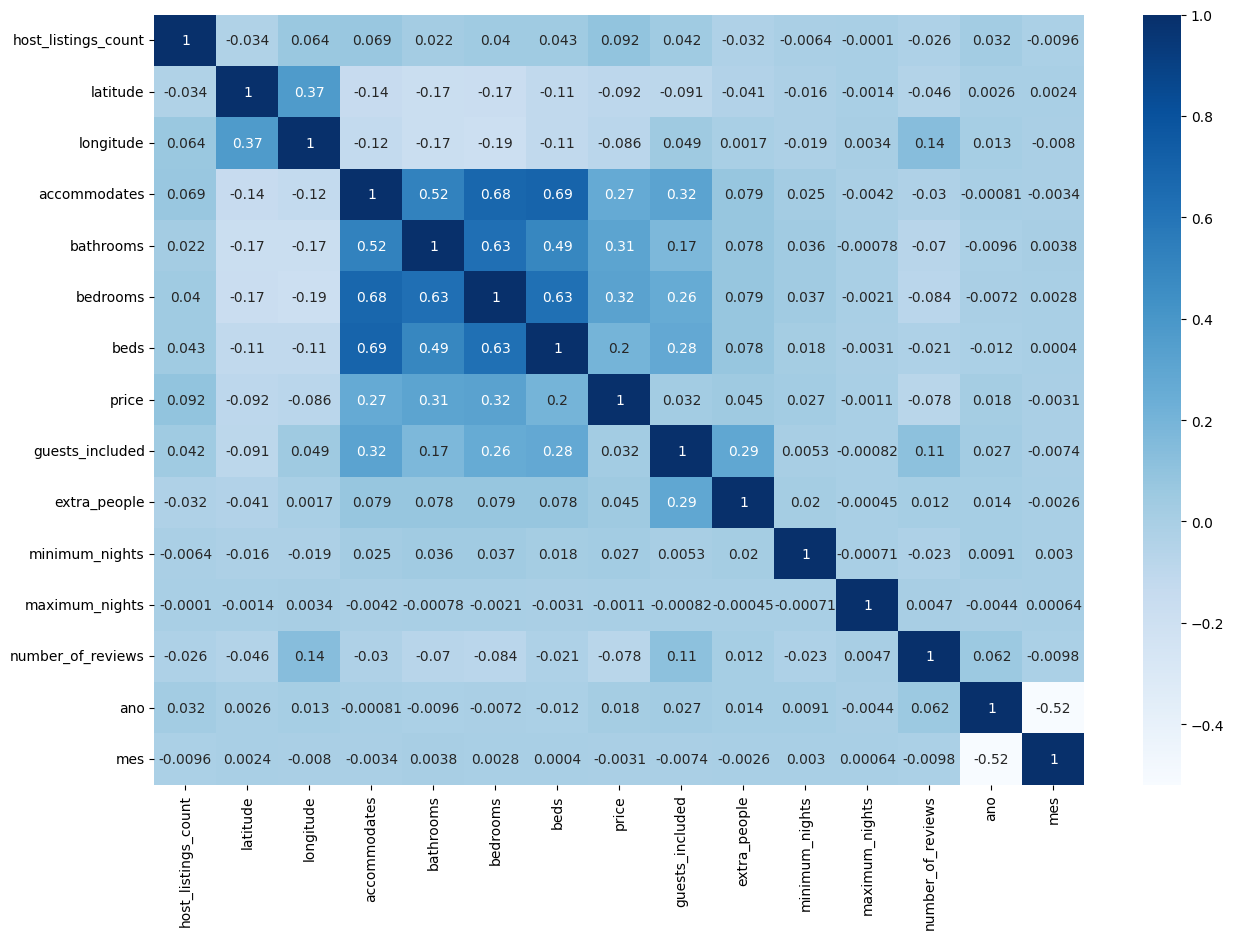

In [29]:
#Gráfico
plt.figure(figsize=(15,10))
#mapa de calor
sns.heatmap(base_airbnb.corr(numeric_only=True),annot=True, cmap='Blues')   #COr do mapa

#Vendo a correlação entre as colunas
#print(base_airbnb.corr(numeric_only=True))

### Definição de limites para Outliers

Iremos definir funções para ajudar na análise de outlier das colunas

In [55]:
def limites(coluna):
  q1 = coluna.quantile(0.25)
  q3 = coluna.quantile(0.75)
  amplitude = q3 - q1
  return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

#Função para remover linhas
def excluir_outliers(df, nome_coluna):
  qnt_linhas = df.shape[0]            #qtd de linhas do DF
  limite_inferior,limite_superior = limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= limite_inferior) & (df[nome_coluna] <= limite_superior), :]   #nosso DF, vamos filtrar apenas as linha onde os valores são maiores que o lim inferior e maior que limite superior
  linhas_excluidas = qnt_linhas - df.shape[0]
  return df, linhas_excluidas

#Verificando 
#print(base_airbnb['price'].describe())   #dá os detalhes da coluna, de quartil, média, min, max etc
#prova real
#print(381 + 1.5 * (601-151))

count    718828.000000
mean        273.392975
std         176.782181
min           0.000000
25%         137.000000
50%         221.000000
75%         381.000000
max         788.000000
Name: price, dtype: float64
1056.0


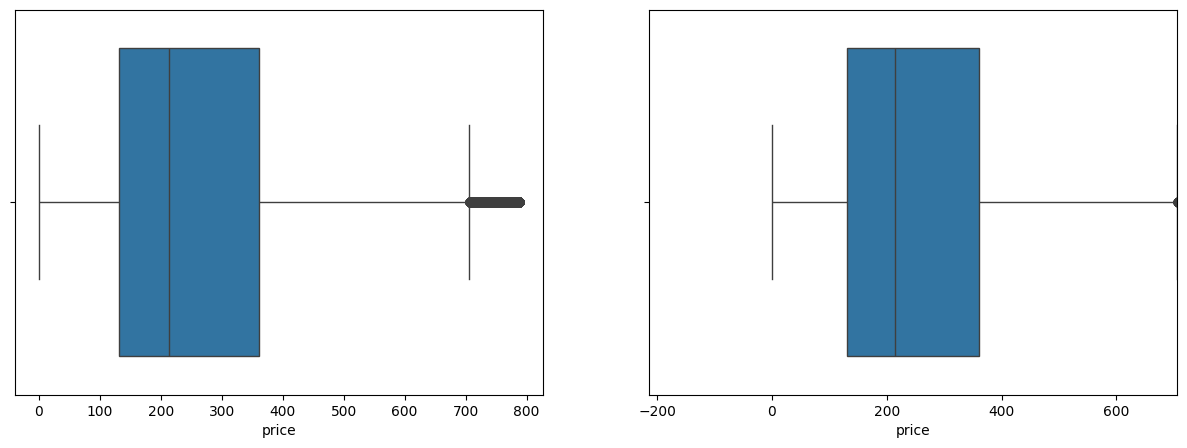

<Figure size 1500x500 with 0 Axes>

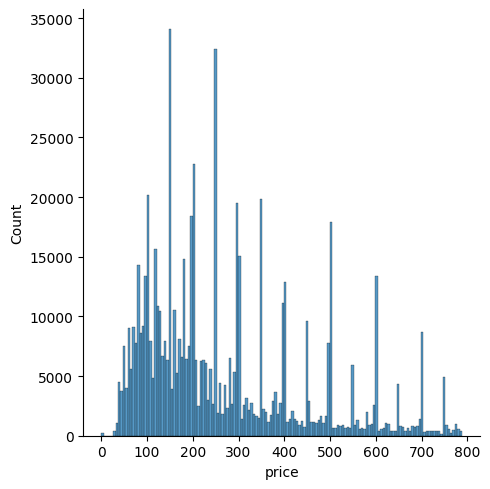

In [63]:
#Analisar Outliers de acordo com os gráficos
def diagrama_caixa(coluna):
 fig, (ax1, ax2) =  plt.subplots(1,2)
 fig.set_size_inches(15,5)
 sns.boxplot(x=coluna, ax=ax1)
 ax2.set_xlim(limites(coluna))
 sns.boxplot(x=coluna, ax=ax2)


def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.displot(coluna, element='bars')

def grafico_barras(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))


diagrama_caixa(base_airbnb['price'])

histograma(base_airbnb['price'])

Estamos fazendo um modelo para imóveis comuns, acreditamos que os imóveis acima do limite padrão são apartamentos de luxo. Por isso, iremos excluir esses outliers

In [51]:
base_airbnb, qnt_linhas = excluir_outliers(base_airbnb, 'price')

print(f'Quantidade de linhas removidas: {qnt_linhas}')

Quantidade de linhas removidas: 29789


<Figure size 1500x500 with 0 Axes>

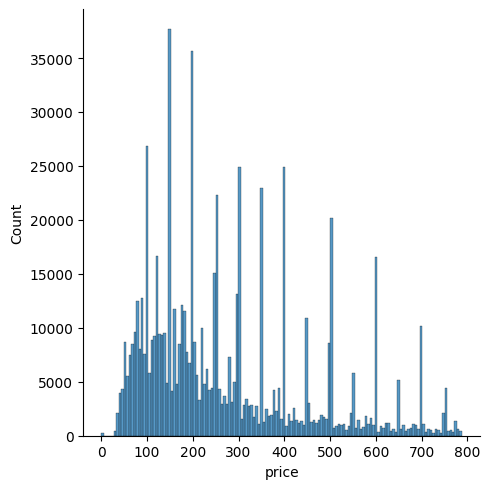

In [53]:
histograma(base_airbnb['price'])

### Analisando Coluna extra-people

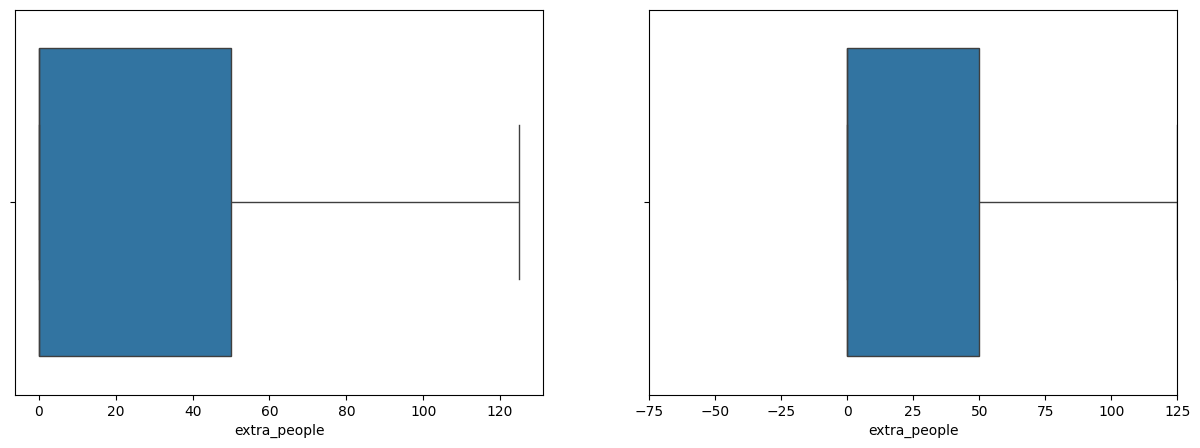

<Figure size 1500x500 with 0 Axes>

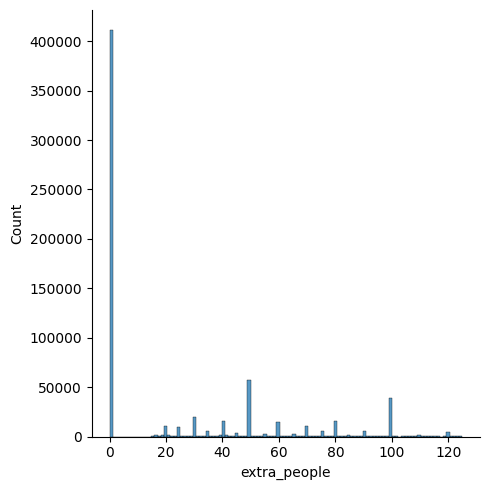

In [65]:
diagrama_caixa(base_airbnb['extra_people'])

histograma(base_airbnb['extra_people'])

In [58]:
#EXCLUIR OUTLIERS EXTRA_people
base_airbnb, qnt_linhas = excluir_outliers(base_airbnb, 'extra_people')

print(f'Quantidade de linhas removidas: {qnt_linhas}')

Quantidade de linhas removidas: 47527


### Analisando coluna host_listings_count 

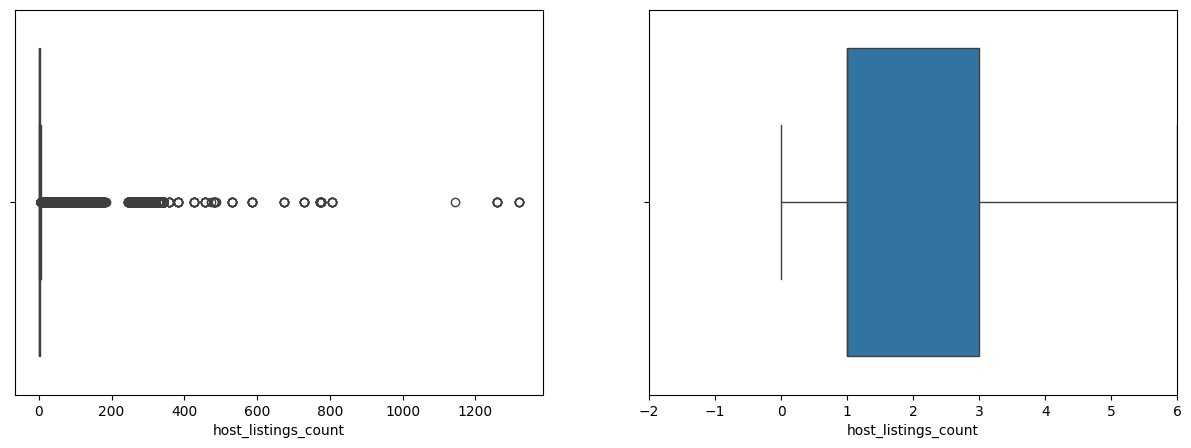

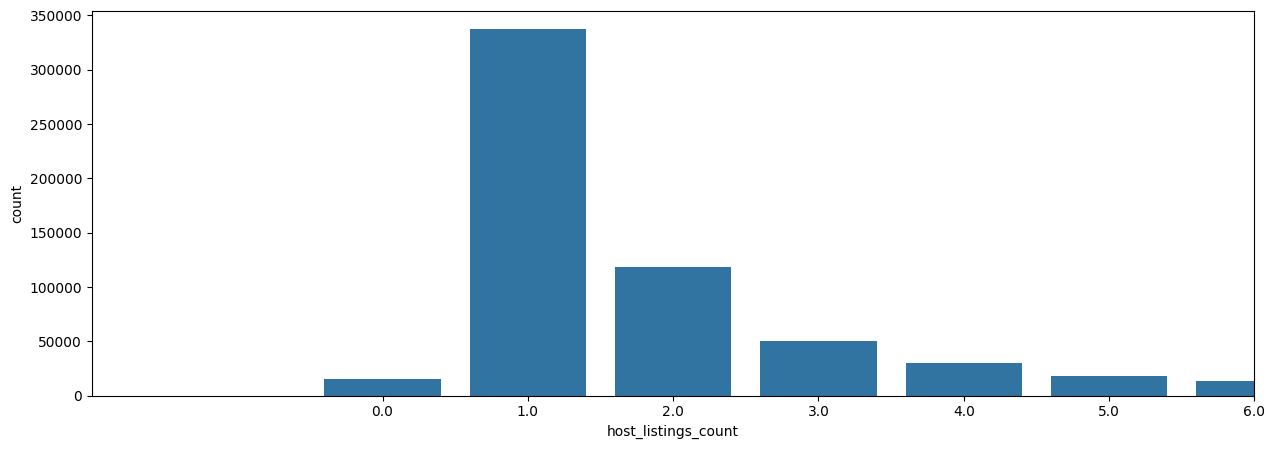

In [64]:
diagrama_caixa(base_airbnb['host_listings_count'])

grafico_barras(base_airbnb['host_listings_count'])

#### Podemos excluir os outlies para o objetivo do nosso projeto. Host com mais de seis imóveis, não é o objetivo do projeto.
- Imaginamos que seja imobliárias

In [66]:
base_airbnb, qnt_linhas = excluir_outliers(base_airbnb, 'host_listings_count')

print(f'Quantidade de linhas removidas: {qnt_linhas}')

Quantidade de linhas removidas: 89191


#### Coluna accommodate

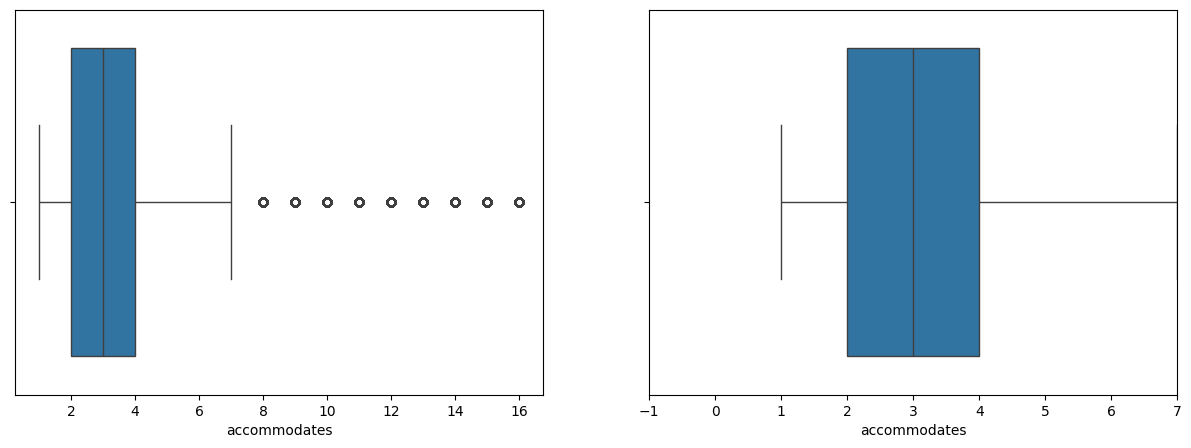

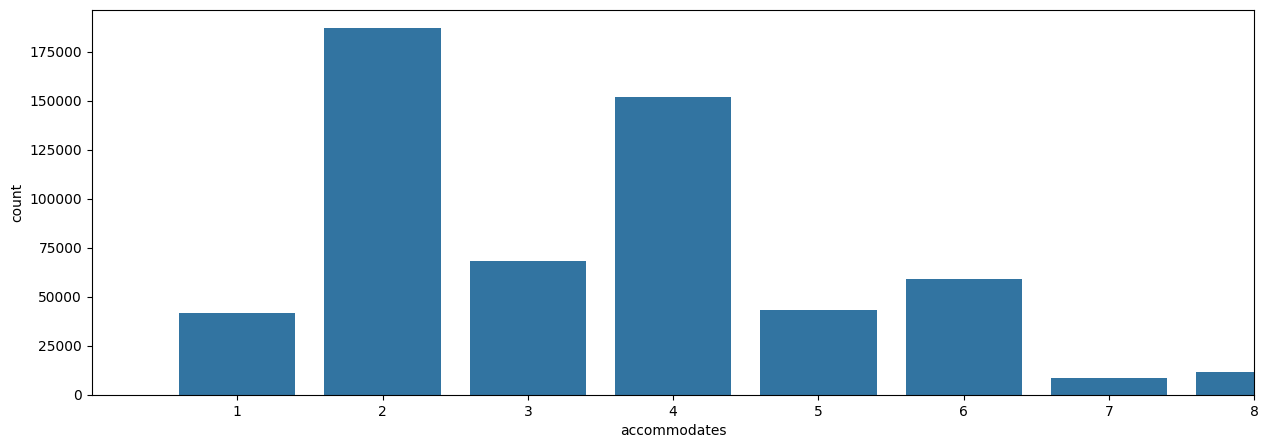

In [68]:
diagrama_caixa(base_airbnb['accommodates'])

grafico_barras(base_airbnb['accommodates'])

In [69]:
#Excluindo OUTLIERS accommodates
base_airbnb, qnt_linhas = excluir_outliers(base_airbnb, 'accommodates')

print(f'Quantidade de linhas removidas: {qnt_linhas}')

Quantidade de linhas removidas: 22610


### Analisando coluna bathrooms

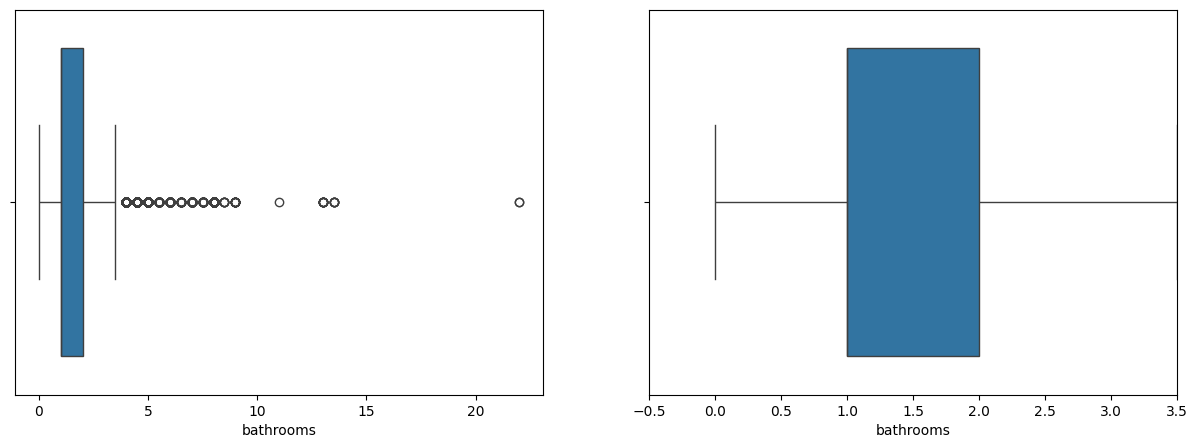

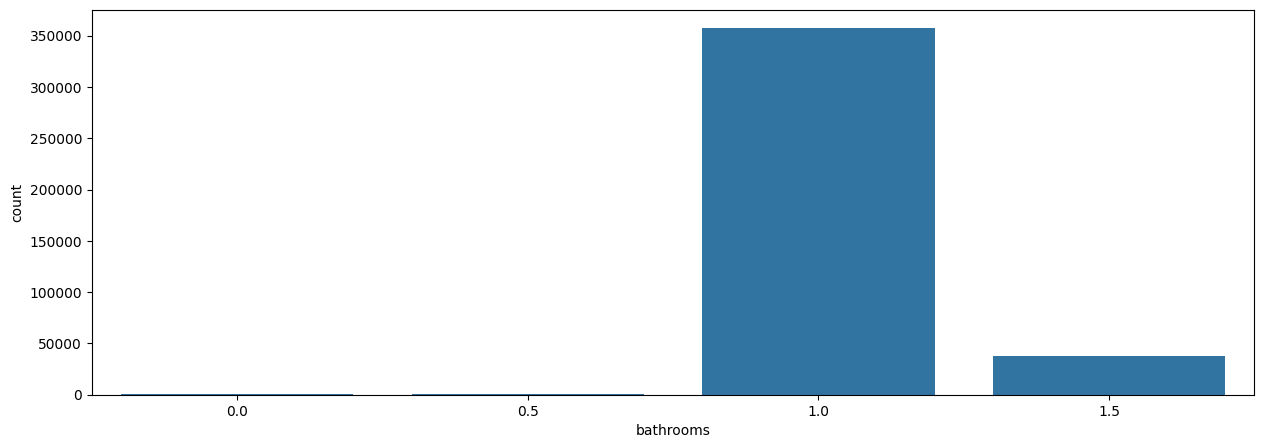

In [70]:
diagrama_caixa(base_airbnb['bathrooms'])

grafico_barras(base_airbnb['bathrooms'])



In [71]:
#Excluindo outliers bathrooms
base_airbnb, qnt_linhas = excluir_outliers(base_airbnb, 'bathrooms')

print(f'Quantidade de linhas removidas: {qnt_linhas}')

Quantidade de linhas removidas: 3298


### Encoding

In [59]:
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


### Modelo de Previsão

### Análise do Melhor Modelo

### Ajustes e Melhorias no Melhor Modelo